In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.drop(['petal length (cm)','petal width (cm)'],axis='columns',inplace=True)
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'sepal width (cm)')

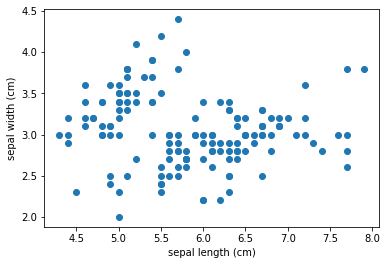

In [13]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [16]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)

In [17]:
y_predicted=km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [18]:
df['cluster']=y_predicted
df.head()

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [22]:
sepalkm.cluster_centers_

array([[5.22409639, 3.1313253 ],
       [6.61044776, 2.96567164]])

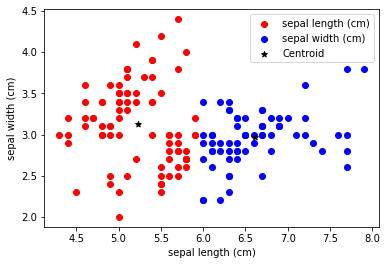

In [25]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(['sepal length (cm)','sepal width (cm)','Centroid'])

In [32]:
k_rng=range(1,11)
sse=[]

for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

In [33]:
sse

[130.4752666666667,
 58.204092789066756,
 37.0507021276596,
 28.011149160808465,
 21.00466066066067,
 17.395204347999353,
 14.753495845788947,
 12.869888944388947,
 11.178657811391512,
 9.44811794638111]

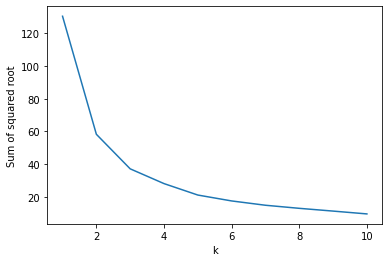

In [34]:
plt.xlabel('k')
plt.ylabel('Sum of squared root')
plt.plot(k_rng,sse)